In [1]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
from termcolor import colored

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import SparseCategoricalAccuracy, Mean

# Train, Valid, Test Dataset

Train Set Shape: (1000, 1),(1000, 1)

Train Set Shape: (300, 1),(300, 1)

Train Set Shape: (300, 1),(300, 1)



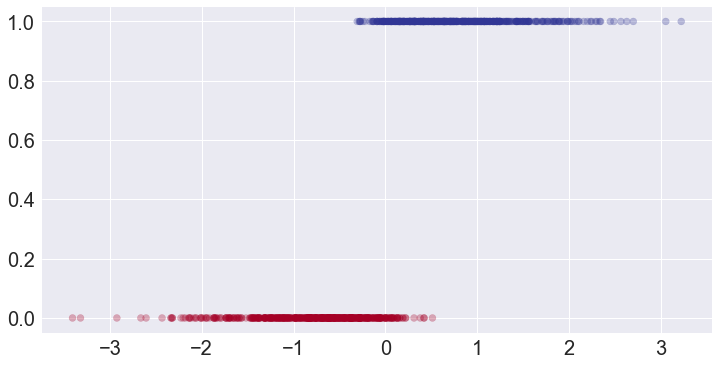

In [7]:
n_train, n_validation, n_test = 1000, 300, 300

#----------------------------Train----------------------------
train_x = np.random.normal(0,1,size = (n_train,1)).astype(np.float32)
x_train_noise = train_x + (0.2 * np.random.normal(0,1,size = (n_train,1))).astype(np.float32)
#train_x_noise를 기준으로 classify한다
train_y = (x_train_noise>=0).astype(np.float32)

#----------------------------Valid----------------------------
validation_x = np.random.normal(0,1,size = (n_validation,1)).astype(np.float32)
validation_x_noise = validation_x + (0.2 * np.random.normal(0,1,size = (n_validation,1))).astype(np.float32)
validation_y = (validation_x_noise>=0).astype(np.float32)

#----------------------------Test----------------------------
test_x = np.random.normal(0,1,size = (n_test,1)).astype(np.float32)
test_x_noise = test_x + (0.2 * np.random.normal(0,1,size = (n_test,1))).astype(np.float32)
test_y = (test_x_noise>=0).astype(np.float32)

print("Train Set Shape: {},{}\n".format(train_x.shape, train_y.shape))
print("Train Set Shape: {},{}\n".format(validation_x.shape, validation_y.shape))
print("Train Set Shape: {},{}\n".format(test_x.shape, test_y.shape))

#plotting
plt.style.use("seaborn")
fig,ax = plt.subplots(figsize = (12,6))
ax.scatter(train_x,train_y, c = train_y, cmap = "RdYlBu", alpha = 0.3)
ax.tick_params(labelsize = 20)


# Make TensorFlow Dataset Object

In [9]:
#tensorflow를 위한 dataset만들기 -> for mini-batch gradient
#Creates a `Dataset` whose elements are slices of the given tensors.

#----------------------------Train----------------------------
train_ds = tf.data.Dataset.from_tensor_slices((train_x,train_y))
train_ds = train_ds.shuffle(n_train).batch(8) # random shuffle, mini-batch size = 8

#----------------------------Validation-----------------------
validation_ds = tf.data.Dataset.from_tensor_slices((validation_x,validation_y))
validation_ds = validation_ds.batch(n_validation) # mini-batch size = n_validation

#----------------------------Test----------------------------
test_ds = tf.data.Dataset.from_tensor_slices((test_x,test_y))
test_ds = test_ds.batch(n_test) # mini-batch size = n_test

# Define Model

In [17]:
#define model
model = Sequential()
model.add(Dense(units = 2, 
                activation = "softmax"))

#loss, optimizer
loss_object = SparseCategoricalCrossentropy()
optimizer = SGD(learning_rate = 1)

#record mean of loss and acc --- Train
train_loss = Mean()
train_acc = SparseCategoricalAccuracy()

#record mean of loss and acc --- Validation
validation_loss = Mean()
validation_acc = SparseCategoricalAccuracy()

#record mean of loss and acc --- Test
test_loss = Mean()
test_acc = SparseCategoricalAccuracy()

#constant
EPOCHS = 10

#To track performance improvement
train_losses, validation_losses = [],[]
train_accs, validation_accs = [],[]



#---------------------Begine Training with Validation---------------------
for epoch in range(EPOCHS):
    for x,y in train_ds:
        #make forward prop for current mini-batch
        with tf.GradientTape() as tape:
            predictions = model(x)
            loss = loss_object(y,predictions)
        
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients,model.trainable_variables))
    
        train_loss(loss)
        train_acc(y,predictions)
    
    #Predict for Validation Dataset- 절대로 학습에 관여하면 안됨:gradient,optimzier X
    for x,y in validation_ds:
        predictions = model(x)
        loss = loss_object(y,predictions)

        validation_loss(loss)
        validation_acc(y,predictions)
        
    template = "\nTrain loss: {:.4f}\tTrain Acc:{:.2f}%\n" +\
               "Validation loss: {:.4f}\tValidation Acc:{:.2f}% \n"        

    print(colored("EPOCH{}\n".format(epoch+1), "grey", "on_cyan"), 
          template.format(train_loss.result(),
                          train_acc.result()*100,
                          validation_loss.result(),
                          validation_acc.result()*100))
    
    #save result of each epoch
    train_losses.append(train_loss.result())
    train_accs.append(train_acc.result()*100)
    validation_losses.append(validation_loss.result())
    validation_accs.append(validation_acc.result()*100)
    
    train_loss.reset_states()
    train_acc.reset_states()
    validation_loss.reset_states()
    validation_acc.reset_states()

#---------------------Begine Testing---------------------
for x,y in test_ds:
    predictions = model(x)
    loss = loss_object(y,predictions)

    test_loss(loss)
    test_acc(y,predictions)

template = "Test loss: {:.4f}\tTest Acc:{:.2f}%\n"    

print(colored("Test Results", "white", "on_blue"), 
      template.format(test_loss.result(),
                      test_acc.result()*100))

EPOCH1
 
Train loss: 0.1845	Train Acc:92.20%
Validation loss: 0.1454	Validation Acc:93.33% 

EPOCH2
 
Train loss: 0.1475	Train Acc:93.80%
Validation loss: 0.1374	Validation Acc:93.33% 

EPOCH3
 
Train loss: 0.1465	Train Acc:93.50%
Validation loss: 0.1298	Validation Acc:94.33% 

EPOCH4
 
Train loss: 0.1453	Train Acc:93.40%
Validation loss: 0.1378	Validation Acc:93.00% 

EPOCH5
 
Train loss: 0.1460	Train Acc:93.10%
Validation loss: 0.1280	Validation Acc:94.00% 

EPOCH6
 
Train loss: 0.1436	Train Acc:93.40%
Validation loss: 0.1651	Validation Acc:92.67% 

EPOCH7
 
Train loss: 0.1474	Train Acc:92.90%
Validation loss: 0.1312	Validation Acc:93.67% 

EPOCH8
 
Train loss: 0.1460	Train Acc:93.60%
Validation loss: 0.1367	Validation Acc:93.00% 

EPOCH9
 
Train loss: 0.1450	Train Acc:93.30%
Validation loss: 0.1376	Validation Acc:93.00% 

EPOCH10
 
Train loss: 0.1442	Train Acc:93.70%
Validation loss: 0.1301	Validation Acc:94.00% 

Test Results Test loss: 0.1481	Test Acc:92.67%



In [18]:
train_losses

[<tf.Tensor: shape=(), dtype=float32, numpy=0.1845496>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.14752224>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.14645043>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.14529029>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.14596875>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.14357643>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.14737724>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.1459639>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.14504361>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.14424655>]

# Define Model as set of Functions with @tf.function
### 같은 모델들을 함수화 해서 만들기
### @tf.function: debugging단계에서는 쓰지않지만 완성된 function에 쓰면 엄청난 performance increase

In [34]:
#define model
model = Sequential()
model.add(Dense(units = 2, 
                activation = "softmax"))

#loss, optimizer
loss_object = SparseCategoricalCrossentropy()
optimizer = SGD(learning_rate = 1)

#record mean of loss and acc --- Train
train_loss = Mean()
train_acc = SparseCategoricalAccuracy()

#record mean of loss and acc --- Validation
validation_loss = Mean()
validation_acc = SparseCategoricalAccuracy()

#record mean of loss and acc --- Test
test_loss = Mean()
test_acc = SparseCategoricalAccuracy()

#constant
EPOCHS = 50

#To track performance improvement
train_losses, validation_losses = [],[]
train_accs, validation_accs = [],[]

In [35]:
@tf.function
def train_step(x,y):
    global model, loss_object, optimizer #global namespace(field)에 있는 걸 가지고 온다 
    global train_loss, train_acc

    with tf.GradientTape() as tape:
        predictions = model(x)
        loss = loss_object(y,predictions)

    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients,model.trainable_variables))

    train_loss(loss)
    train_acc(y,predictions)
    
@tf.function
def validation_step():
    global validation_ds, loss_object
    global validation_loss,validation_acc
    
    for x,y in validation_ds:
        predictions = model(x)
        loss = loss_object(y,predictions)

        validation_loss(loss)
        validation_acc(y,predictions)
        
def train_reporter():
    global epoch
    global train_loss, train_acc
    global validation_loss, validation_acc
    
    template = "\nTrain loss: {:.4f}\tTrain Acc:{:.2f}%\n" +\
               "Validation loss: {:.4f}\tValidation Acc:{:.2f}% \n"        

    print(colored("EPOCH{}\n".format(epoch+1), "grey", "on_cyan"), 
          template.format(train_loss.result(),
                          train_acc.result()*100,
                          validation_loss.result(),
                          validation_acc.result()*100))
    
def metric_reseter():
    global train_losses, train_accs, validation_losses, validation_accs
    global train_loss, train_acc, validation_loss, validation_acc
    
    train_losses.append(train_loss.result())
    train_accs.append(train_acc.result()*100)
    validation_losses.append(validation_loss.result())
    validation_accs.append(validation_acc.result()*100)
    
    train_loss.reset_states()
    train_acc.reset_states()
    validation_loss.reset_states()
    validation_acc.reset_states()
    
def final_result_visualization():
    global train_losses,train_accs
    global validation_losses, validation_accs
    
    fig, axes = plt.subplots(2,1, figsize = (15,15))
    axes[0].plot(train_losses, label = "Train Loss")
    axes[0].plot(validation_losses, label = "Validation Loss")
    
    axes[1].plot(train_accs, label = "Train Acc")
    axes[1].plot(validation_accs, label = "Validation Acc")
    
    axes[0].tick_params(labelsize = 20)
    axes[1].tick_params(labelsize = 20)
    
    axes[0].set_ylabel("Binary Cross Entropy", fontsize = 20)
    axes[1].set_ylabel("Accuray", fontsize = 20)
    
    axes[1].set_xlabel("Epoch", fontsize = 20)
    
    axes[0].legend(fontsize = 20, loc = "upper right")
    axes[1].legend(fontsize = 20, loc = "lower right")
    
#---------------------Begine Training with Validation---------------------
for epoch in range(EPOCHS):
    #training step 
    for x,y in train_ds:
        train_step(x,y)

    #validation step    
    validation_step()
 
    #report the result from current epoch
    train_reporter()

    #save/reset result of each epoch
    metric_reseter()

#---------------------Begine Testing---------------------
for x,y in test_ds:
    predictions = model(x)
    loss = loss_object(y,predictions)

    test_loss(loss)
    test_acc(y,predictions)

template = "Test loss: {:.4f}\tTest Acc:{:.2f}%\n"    

print(colored("Test Results", "white", "on_blue"), 
      template.format(test_loss.result(),
                      test_acc.result()*100))

EPOCH1
 
Train loss: 0.1816	Train Acc:92.80%
Validation loss: 0.1431	Validation Acc:93.67% 

EPOCH2
 
Train loss: 0.1489	Train Acc:93.00%
Validation loss: 0.1342	Validation Acc:94.00% 

EPOCH3
 
Train loss: 0.1411	Train Acc:94.00%
Validation loss: 0.1681	Validation Acc:92.67% 

EPOCH4
 
Train loss: 0.1452	Train Acc:93.20%
Validation loss: 0.1298	Validation Acc:93.67% 

EPOCH5
 
Train loss: 0.1453	Train Acc:93.10%
Validation loss: 0.1276	Validation Acc:94.00% 

EPOCH6
 
Train loss: 0.1455	Train Acc:93.60%
Validation loss: 0.1286	Validation Acc:94.67% 

EPOCH7
 
Train loss: 0.1471	Train Acc:93.30%
Validation loss: 0.1276	Validation Acc:93.67% 

EPOCH8
 
Train loss: 0.1460	Train Acc:93.70%
Validation loss: 0.1273	Validation Acc:94.00% 

EPOCH9
 
Train loss: 0.1436	Train Acc:93.20%
Validation loss: 0.1283	Validation Acc:94.67% 

EPOCH10
 
Train loss: 0.1456	Train Acc:93.60%
Validation loss: 0.1280	Validation Acc:93.67% 

EPOCH11
 
Train loss: 0.1462	Train Acc:93.50%
Validation loss: 0.1278

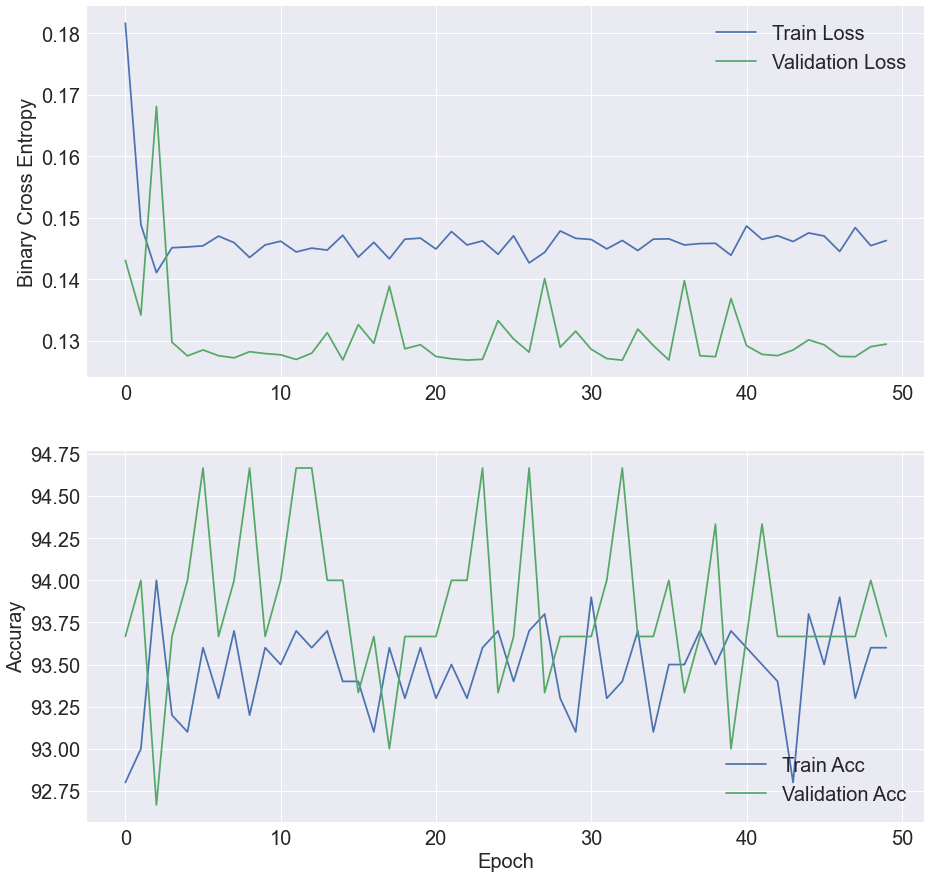

In [36]:
final_result_visualization()